# Import

In [ ]:
!pip install evaluate datasets accelerate --quiet
!pip install git+https://github.com/huggingface/transformers.git --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.4 MB/s eta 0:00:00
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-exubnlh1
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-exubnlh1
  Resolved https://github.com/huggingface/transformers.git to commit a5c903f877fda21e739027eed133e03162eb7712
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.6/515.6 kB 14.0 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-5.0.0.dev0-py3-none-any.whl size=10912573 sha256=1565725774ff9b167e72d6543d3207170a9547eb7ffea8cbbe611d4a2960f26e
  Stored in directory: /tmp/pip-ephem-wheel-cache-nzmjrns2/wheels/54/cb/3f/83103de5575c534436d6a4686686dead458238dfaf1147e98d
Successfully built transformers
  Attempting uninstall: huggingface-hub
    Foun

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, f1_score
from datasets import Dataset, Image, ClassLabel, load_dataset
import evaluate

import torch
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomRotation,
    RandomResizedCrop,
    RandomHorizontalFlip,
    RandomAdjustSharpness,
    ColorJitter,
    Resize,
    ToTensor
)

from transformers import (
    TrainingArguments,
    Trainer,
    # ViTImageProcessor,
    # ViTForImageClassification,
    AutoImageProcessor,
    AutoModelForImageClassification,
    DefaultDataCollator
)

In [ ]:
def set_random_seed(seed_value):
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_value = 42
set_random_seed(seed_value)

# Data Load

In [ ]:
#ds = load_dataset("xingjunm/WildDeepfake") # 데이터셋 너무 큼
ds_fake_test = load_dataset("xingjunm/WildDeepfake", data_dir='deepfake_in_the_wild/fake_test')
ds_real_test = load_dataset("xingjunm/WildDeepfake", data_dir='deepfake_in_the_wild/real_test')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/115 [00:00<?, ?it/s]

deepfake_in_the_wild/fake_test/1.tar.gz:   0%|          | 0.00/69.7M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/10.tar.gz:   0%|          | 0.00/14.6M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/100.tar.g(…):   0%|          | 0.00/28.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/101.tar.g(…):   0%|          | 0.00/4.11M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/102.tar.g(…):   0%|          | 0.00/27.7M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/103.tar.g(…):   0%|          | 0.00/61.3M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/104.tar.g(…):   0%|          | 0.00/43.9M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/105.tar.g(…):   0%|          | 0.00/47.3M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/106.tar.g(…):   0%|          | 0.00/26.6M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/107.tar.g(…):   0%|          | 0.00/47.5M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/108.tar.g(…):   0%|          | 0.00/24.7M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/109.tar.g(…):   0%|          | 0.00/33.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/11.tar.gz:   0%|          | 0.00/82.6M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/110.tar.g(…):   0%|          | 0.00/46.6M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/111.tar.g(…):   0%|          | 0.00/295M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/112.tar.g(…):   0%|          | 0.00/53.0M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/113.tar.g(…):   0%|          | 0.00/36.5M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/114.tar.g(…):   0%|          | 0.00/19.7M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/115.tar.g(…):   0%|          | 0.00/5.28M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/12.tar.gz:   0%|          | 0.00/47.9M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/13.tar.gz:   0%|          | 0.00/211M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/14.tar.gz:   0%|          | 0.00/39.7M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/15.tar.gz:   0%|          | 0.00/27.5M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/16.tar.gz:   0%|          | 0.00/21.9M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/17.tar.gz:   0%|          | 0.00/42.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/18.tar.gz:   0%|          | 0.00/63.4M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/19.tar.gz:   0%|          | 0.00/35.3M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/2.tar.gz:   0%|          | 0.00/34.4M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/20.tar.gz:   0%|          | 0.00/10.8M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/21.tar.gz:   0%|          | 0.00/101M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/22.tar.gz:   0%|          | 0.00/176M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/23.tar.gz:   0%|          | 0.00/52.5M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/24.tar.gz:   0%|          | 0.00/72.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/25.tar.gz:   0%|          | 0.00/34.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/26.tar.gz:   0%|          | 0.00/55.0M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/27.tar.gz:   0%|          | 0.00/90.4M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/28.tar.gz:   0%|          | 0.00/32.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/29.tar.gz:   0%|          | 0.00/54.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/3.tar.gz:   0%|          | 0.00/36.5M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/30.tar.gz:   0%|          | 0.00/69.1M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/31.tar.gz:   0%|          | 0.00/58.1M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/32.tar.gz:   0%|          | 0.00/27.3M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/33.tar.gz:   0%|          | 0.00/38.0M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/34.tar.gz:   0%|          | 0.00/8.35M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/35.tar.gz:   0%|          | 0.00/183M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/36.tar.gz:   0%|          | 0.00/82.6M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/37.tar.gz:   0%|          | 0.00/58.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/38.tar.gz:   0%|          | 0.00/48.1M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/39.tar.gz:   0%|          | 0.00/5.29M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/4.tar.gz:   0%|          | 0.00/35.1M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/40.tar.gz:   0%|          | 0.00/159M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/41.tar.gz:   0%|          | 0.00/33.0M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/42.tar.gz:   0%|          | 0.00/18.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/43.tar.gz:   0%|          | 0.00/50.1M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/44.tar.gz:   0%|          | 0.00/68.4M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/45.tar.gz:   0%|          | 0.00/31.4M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/46.tar.gz:   0%|          | 0.00/74.6M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/47.tar.gz:   0%|          | 0.00/146M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/48.tar.gz:   0%|          | 0.00/23.8M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/49.tar.gz:   0%|          | 0.00/61.0M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/5.tar.gz:   0%|          | 0.00/9.33M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/50.tar.gz:   0%|          | 0.00/51.4M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/51.tar.gz:   0%|          | 0.00/48.7M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/52.tar.gz:   0%|          | 0.00/59.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/53.tar.gz:   0%|          | 0.00/25.5M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/54.tar.gz:   0%|          | 0.00/202M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/55.tar.gz:   0%|          | 0.00/24.6M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/56.tar.gz:   0%|          | 0.00/126M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/57.tar.gz:   0%|          | 0.00/21.1M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/58.tar.gz:   0%|          | 0.00/54.0M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/59.tar.gz:   0%|          | 0.00/32.4M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/6.tar.gz:   0%|          | 0.00/12.5M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/60.tar.gz:   0%|          | 0.00/13.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/61.tar.gz:   0%|          | 0.00/51.3M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/62.tar.gz:   0%|          | 0.00/51.4M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/63.tar.gz:   0%|          | 0.00/56.5M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/64.tar.gz:   0%|          | 0.00/67.3M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/65.tar.gz:   0%|          | 0.00/72.8M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/66.tar.gz:   0%|          | 0.00/37.7M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/67.tar.gz:   0%|          | 0.00/49.9M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/68.tar.gz:   0%|          | 0.00/50.4M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/69.tar.gz:   0%|          | 0.00/54.9M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/7.tar.gz:   0%|          | 0.00/246M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/70.tar.gz:   0%|          | 0.00/80.8M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/71.tar.gz:   0%|          | 0.00/17.4M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/72.tar.gz:   0%|          | 0.00/23.6M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/73.tar.gz:   0%|          | 0.00/38.7M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/74.tar.gz:   0%|          | 0.00/40.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/75.tar.gz:   0%|          | 0.00/93.3M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/76.tar.gz:   0%|          | 0.00/205M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/77.tar.gz:   0%|          | 0.00/58.8M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/78.tar.gz:   0%|          | 0.00/74.9M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/79.tar.gz:   0%|          | 0.00/57.9M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/8.tar.gz:   0%|          | 0.00/16.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/80.tar.gz:   0%|          | 0.00/10.4M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/81.tar.gz:   0%|          | 0.00/72.5M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/82.tar.gz:   0%|          | 0.00/27.8M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/83.tar.gz:   0%|          | 0.00/61.6M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/84.tar.gz:   0%|          | 0.00/37.8M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/85.tar.gz:   0%|          | 0.00/62.3M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/86.tar.gz:   0%|          | 0.00/35.6M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/87.tar.gz:   0%|          | 0.00/48.1M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/88.tar.gz:   0%|          | 0.00/105M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/89.tar.gz:   0%|          | 0.00/87.4M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/9.tar.gz:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/90.tar.gz:   0%|          | 0.00/23.8M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/91.tar.gz:   0%|          | 0.00/18.5M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/92.tar.gz:   0%|          | 0.00/49.6M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/93.tar.gz:   0%|          | 0.00/23.0M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/94.tar.gz:   0%|          | 0.00/46.9M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/95.tar.gz:   0%|          | 0.00/18.0M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/96.tar.gz:   0%|          | 0.00/5.40M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/97.tar.gz:   0%|          | 0.00/3.88M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/98.tar.gz:   0%|          | 0.00/45.2M [00:00<?, ?B/s]

deepfake_in_the_wild/fake_test/99.tar.gz:   0%|          | 0.00/49.3M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Resolving data files:   0%|          | 0/42 [00:00<?, ?it/s]

deepfake_in_the_wild/real_test/104.tar.g(…):   0%|          | 0.00/95.5M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/12.tar.gz:   0%|          | 0.00/80.6M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/13.tar.gz:   0%|          | 0.00/243M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/15.tar.gz:   0%|          | 0.00/110M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/16.tar.gz:   0%|          | 0.00/39.5M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/17.tar.gz:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/19.tar.gz:   0%|          | 0.00/64.3M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/24.tar.gz:   0%|          | 0.00/50.8M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/26.tar.gz:   0%|          | 0.00/44.2M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/27.tar.gz:   0%|          | 0.00/89.5M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/28.tar.gz:   0%|          | 0.00/61.1M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/29.tar.gz:   0%|          | 0.00/185M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/3.tar.gz:   0%|          | 0.00/23.9M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/32.tar.gz:   0%|          | 0.00/2.62M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/37.tar.gz:   0%|          | 0.00/63.8M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/41.tar.gz:   0%|          | 0.00/7.63M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/44.tar.gz:   0%|          | 0.00/495M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/45.tar.gz:   0%|          | 0.00/51.7M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/46.tar.gz:   0%|          | 0.00/71.3M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/50.tar.gz:   0%|          | 0.00/103M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/51.tar.gz:   0%|          | 0.00/47.5M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/52.tar.gz:   0%|          | 0.00/18.7M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/53.tar.gz:   0%|          | 0.00/112M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/57.tar.gz:   0%|          | 0.00/68.1M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/6.tar.gz:   0%|          | 0.00/57.3M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/66.tar.gz:   0%|          | 0.00/8.28M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/69.tar.gz:   0%|          | 0.00/272M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/72.tar.gz:   0%|          | 0.00/67.2M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/73.tar.gz:   0%|          | 0.00/85.8M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/74.tar.gz:   0%|          | 0.00/80.5M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/78.tar.gz:   0%|          | 0.00/129M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/79.tar.gz:   0%|          | 0.00/55.1M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/8.tar.gz:   0%|          | 0.00/5.88M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/81.tar.gz:   0%|          | 0.00/123M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/82.tar.gz:   0%|          | 0.00/10.5M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/83.tar.gz:   0%|          | 0.00/52.0M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/84.tar.gz:   0%|          | 0.00/15.1M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/86.tar.gz:   0%|          | 0.00/92.0M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/9.tar.gz:   0%|          | 0.00/4.33M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/91.tar.gz:   0%|          | 0.00/8.50M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/92.tar.gz:   0%|          | 0.00/174M [00:00<?, ?B/s]

deepfake_in_the_wild/real_test/93.tar.gz:   0%|          | 0.00/62.8M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
fake_ds = ds_fake_test['train']
real_ds = ds_real_test['train']

print(fake_ds)
print(real_ds)

fake_ds['png'][0].size

Dataset({
    features: ['png', '__key__', '__url__'],
    num_rows: 107003
})
Dataset({
    features: ['png', '__key__', '__url__'],
    num_rows: 58659
})


(224, 224)

In [ ]:
from datasets import concatenate_datasets

fake_ds = fake_ds.add_column("label", [1] * len(fake_ds))
real_ds = real_ds.add_column("label", [0] * len(real_ds))

dataset = concatenate_datasets([fake_ds, real_ds])
dataset

Dataset({
    features: ['png', '__key__', '__url__', 'label'],
    num_rows: 165662
})

In [ ]:
len(fake_ds)

107003

In [ ]:
# Define the list of unique labels
labels_list = ['Realism', 'Deepfake']

# Initialize dictionaries to map labels to IDs and vice versa
label2id, id2label = dict(), dict()
for i, label in enumerate(labels_list):
    label2id[label] = i
    id2label[i] = label

# Create ClassLabels object
ClassLabels = ClassLabel(num_classes=len(labels_list), names=labels_list)

In [ ]:
# Print the resulting dictionaries for reference
print("Mapping of IDs to Labels:", id2label, '\n')
print("Mapping of Labels to IDs:", label2id)

Mapping of IDs to Labels: {0: 'Realism', 1: 'Deepfake'} 

Mapping of Labels to IDs: {'Realism': 0, 'Deepfake': 1}


In [ ]:
# Casting label column to ClassLabel Object
dataset = dataset.cast_column('label', ClassLabels)
dataset = dataset.train_test_split(test_size=0.3, shuffle=True, stratify_by_column="label")

# Extracting the training data from the split dataset.
train_data = dataset['train']

# Extracting the testing data from the split dataset.
test_data = dataset['test']

Casting the dataset:   0%|          | 0/165662 [00:00<?, ? examples/s]

# Model

- Vit
- ConvNeXt V2

In [ ]:
# Define the pre-trained ViT model string
#model_str = "google/vit-base-patch16-224-in21k"
model_str = "facebook/convnextv2-base-22k-224"

# Create a processor for ViT model input
#processor = ViTImageProcessor.from_pretrained(model_str)
processor = AutoImageProcessor.from_pretrained(model_str)

# Retrieve the image mean and standard deviation used for normalization
image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["shortest_edge"]

# Define transformations for training and validation data
_train_transforms = Compose(
    [
        Resize((size, size)),
        RandomHorizontalFlip(p=0.5),
        RandomRotation(10),
        RandomAdjustSharpness(1.5, p=0.3),
        ToTensor(),
        Normalize(mean=image_mean, std=image_std)
    ]
)

_val_transforms = Compose(
    [
        Resize((size, size)),
        ToTensor(),
        Normalize(mean=image_mean, std=image_std)
    ]
)

# Define functions to apply transformations
def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['png']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in examples['png']]
    return examples

# Set transforms for training and test data
train_data.set_transform(train_transforms)
test_data.set_transform(val_transforms)

In [ ]:
def collate_fn(examples):
    pixel_values = torch.stack([example["pixel_values"] for example in examples])
    labels = torch.tensor([example['label'] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
# Create a ViTForImageClassification model
#model = ViTForImageClassification.from_pretrained(model_str, num_labels=len(labels_list))
# model.config.id2label = id2label
# model.config.label2id = label2id

# # BackBone Freeze
# for param in model.vit.parameters():
#     param.requires_grad = False

# # 마지막 1개 encoder layer 학습
# for layer in model.vit.encoder.layer[-1:]:
#     for param in layer.parameters():
#         param.requires_grad = True

# # classifier는 계속 학습
# for param in model.classifier.parameters():
#     param.requires_grad = True

# # Calculate and print the number of trainable parameters in millions for the model.
# print(model.num_parameters(only_trainable=True) / 1e6)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/200 [00:00<?, ?it/s]

ViTForImageClassification LOAD REPORT from: google/vit-base-patch16-224-in21k
Key                 | Status     | 
--------------------+------------+-
pooler.dense.bias   | UNEXPECTED | 
pooler.dense.weight | UNEXPECTED | 
classifier.bias     | MISSING    | 
classifier.weight   | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing form the checkpoint. Consider training on your downstream task.


7.08941


In [ ]:
model = AutoModelForImageClassification.from_pretrained(
    model_str,
    num_labels=len(labels_list),
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
)

# BackBone Freeze
for param in model.convnextv2.parameters():
    param.requires_grad = False

# 마지막 2개 Stage만 학습하도록 FT 가능
for param in model.convnextv2.encoder.stages[-2].parameters():
    param.requires_grad = True

# Classifier는 계속 학습
for param in model.classifier.parameters():
    param.requires_grad = True

print("Trainable params (M):", model.num_parameters(only_trainable=True) / 1e6)

Loading weights:   0%|          | 0/380 [00:00<?, ?it/s]

ConvNextV2ForImageClassification LOAD REPORT from: facebook/convnextv2-base-22k-224
Key               | Status   |                                                                                          
------------------+----------+------------------------------------------------------------------------------------------
classifier.weight | MISMATCH | Reinit due to size mismatch ckpt: torch.Size([1000, 1024]) vs model:torch.Size([2, 1024])
classifier.bias   | MISMATCH | Reinit due to size mismatch ckpt: torch.Size([1000]) vs model:torch.Size([2])            
classifier.weight | MISC     | 'Linear' object has no attribute 'param_name'
Error when processing parameter cl         
classifier.bias   | MISC     | 'Linear' object has no attribute 'param_name'
Error when processing parameter cl         

Notes:
- MISMATCH	:ckpt weights were loaded, but they did not match the original empty weight.
- MISC	:originate from the conversion scheme


Trainable params (M): 58.049026


In [ ]:
# Load the accuracy metric from a module named 'evaluate'
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

# Define a function 'compute_metrics' to calculate evaluation metrics
def compute_metrics(eval_pred):
    preds = eval_pred.predictions.argmax(axis=1)
    labels = eval_pred.label_ids
    return {
        "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
        "f1": f1.compute(predictions=preds, references=labels, average="weighted")["f1"]
    }

In [ ]:
# Define training arguments
args = TrainingArguments(
    output_dir="DeepFake-ConvNeXtV2--Model",
    logging_dir='./logs',
    eval_strategy="epoch", # 버전에 맞춰서 eval_~
    learning_rate=5e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.02,
    warmup_ratio=0.1,
    remove_unused_columns=False,
    save_strategy='epoch',
    metric_for_best_model='f1', # 설정 필요
    load_best_model_at_end=True,
    save_total_limit=1,
    report_to="wandb",
    fp16=True,
    optim="adamw_torch_fused",
    gradient_accumulation_steps=1,
    gradient_checkpointing=False # 메모리는 효율적이지만 연산량 증가 -> 학습 시간 증가
)

# Create a Trainer instance
trainer = Trainer(
    model,
    args,
    train_dataset=train_data,
    eval_dataset=test_data,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    processing_class=processor, # 버전에 따라 processing_class 충돌날수도
)

warmup_ratio is deprecated and will be removed in v5.2. Use `warmup_steps` instead.
`logging_dir` is deprecated and will be removed in v5.2. Please set `TENSORBOARD_LOGGING_DIR` instead.


In [ ]:
trainer.evaluate()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: eb9862 (eb9862-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


{'eval_loss': 0.7846106886863708,
 'eval_model_preparation_time': 0.0055,
 'eval_accuracy': 0.4564478158514256,
 'eval_f1': 0.46093314408126357,
 'eval_runtime': 605.3738,
 'eval_samples_per_second': 82.096,
 'eval_steps_per_second': 10.263}

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Model Preparation Time,Accuracy,F1
1,0.009400,0.003769,0.005500,0.998612,0.998612
2,0.003600,0.002008,0.005500,0.999316,0.999316
3,0.001500,0.001690,0.005500,0.999215,0.999215


TrainOutput(global_step=5436, training_loss=0.02319684936072214, metrics={'train_runtime': 9495.3862, 'train_samples_per_second': 36.638, 'train_steps_per_second': 0.572, 'total_flos': 2.7553915881876787e+19, 'train_loss': 0.02319684936072214, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.0020075575448572636,
 'eval_model_preparation_time': 0.0055,
 'eval_accuracy': 0.9993158816072758,
 'eval_f1': 0.9993158376629944,
 'eval_runtime': 598.6594,
 'eval_samples_per_second': 83.017,
 'eval_steps_per_second': 10.378,
 'epoch': 3.0}

# 예측 결과

In [ ]:
outputs = trainer.predict(test_data)
print(outputs.metrics)

{'test_loss': 0.0020075575448572636, 'test_model_preparation_time': 0.0055, 'test_accuracy': 0.9993158816072758, 'test_f1': 0.9993158376629944, 'test_runtime': 595.6848, 'test_samples_per_second': 83.432, 'test_steps_per_second': 10.43}


In [ ]:
!pwd

/content


In [ ]:
output_dir = "/exmaple/model"

# Save model
trainer.save_model(output_dir=output_dir)

# Save processor (Same directory)
processor.save_pretrained(output_dir)

['/content/drive/MyDrive/boostcamp_aitech/deepfake_classification/model/convnextv2/preprocessor_config.json']

Accuracy: 0.9993
F1 Score: 0.9993


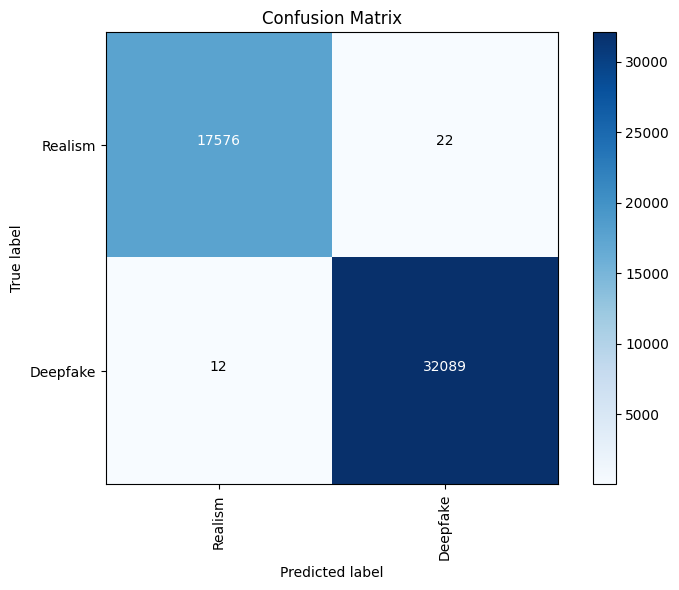


Classification report:

              precision    recall  f1-score   support

     Realism     0.9993    0.9987    0.9990     17598
    Deepfake     0.9993    0.9996    0.9995     32101

    accuracy                         0.9993     49699
   macro avg     0.9993    0.9992    0.9993     49699
weighted avg     0.9993    0.9993    0.9993     49699



In [ ]:
# Extract the true labels from the model outputs
y_true = outputs.label_ids

# Predict the labels by selecting the class with the highest probability
y_pred = outputs.predictions.argmax(1)

# Define a function to plot a confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues, figsize=(10, 8)):
    """
    This function plots a confusion matrix.

    Parameters:
        cm (array-like): Confusion matrix as returned by sklearn.metrics.confusion_matrix.
        classes (list): List of class names, e.g., ['Class 0', 'Class 1'].
        title (str): Title for the plot.
        cmap (matplotlib colormap): Colormap for the plot.
    """
    # Create a figure with a specified size
    plt.figure(figsize=figsize)

    # Display the confusion matrix as an image with a colormap
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # Define tick marks and labels for the classes on the axes
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.0f'
    # Add text annotations to the plot indicating the values in the cells
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    # Label the axes
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Ensure the plot layout is tight
    plt.tight_layout()
    # Display the plot
    plt.show()

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='macro')

# Display accuracy and F1 score
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

# Get the confusion matrix if there are a small number of labels
if len(labels_list) <= 150:
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot the confusion matrix using the defined function
    plot_confusion_matrix(cm, labels_list, figsize=(8, 6))

# Finally, display classification report
print()
print("Classification report:")
print()
print(classification_report(y_true, y_pred, target_names=labels_list, digits=4))